In [1]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

In [5]:
dataset = 'datasets/keypoint1000_2d.csv'
model_save_path = 'models/keypoint_classifier.hdf5'
tflite_save_path = 'models/keypoint_classifier.tflite'

# Set number of classes

In [6]:
NUM_CLASSES = 12

# Dataset reading

In [7]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [8]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# Model building

In [10]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(128, activation='relu'),  # Increased units
    tf.keras.layers.BatchNormalization(),  # Added Batch Normalization
    tf.keras.layers.Dropout(0.3),  # Adjusted dropout rate
    tf.keras.layers.Dense(64, activation='relu'),  # Increased units
    tf.keras.layers.BatchNormalization(),  # Added Batch Normalization
    tf.keras.layers.Dense(32, activation='relu'),  # Increased units
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [11]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 42)                0         
                                                                 
 dense (Dense)               (None, 128)               5504      
                                                                 
 batch_normalization (Batch  (None, 128)               512       
 Normalization)                                                  
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 batch_normalization_1 (Bat  (None, 64)                256       
 chNormalization)                                       

In [12]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [13]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model training

In [14]:
es_callback

In [15]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000




56/71 [======================>.......] - ETA: 0s - loss: 2.6611 - accuracy: 0.1102
Epoch 1: saving model to models\keypoint_classifier.hdf5
71/71 [==============================] - 3s 9ms/step - loss: 2.6312 - accuracy: 0.1126 - val_loss: 2.4537 - val_accuracy: 0.1220
Epoch 2/1000
39/71 [===============>..............] - ETA: 0s - loss: 2.4511 - accuracy: 0.1406

c:\Users\Ian\git\553.806_Capstone_HandGesture\.venv\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


59/71 [=======================>......] - ETA: 0s - loss: 2.4337 - accuracy: 0.1504
Epoch 2: saving model to models\keypoint_classifier.hdf5
71/71 [==============================] - 0s 4ms/step - loss: 2.4276 - accuracy: 0.1522 - val_loss: 2.4041 - val_accuracy: 0.1727
Epoch 3/1000
55/71 [======================>.......] - ETA: 0s - loss: 2.3564 - accuracy: 0.1747
Epoch 3: saving model to models\keypoint_classifier.hdf5
71/71 [==============================] - 0s 4ms/step - loss: 2.3421 - accuracy: 0.1758 - val_loss: 2.2979 - val_accuracy: 0.2253
Epoch 4/1000
56/71 [======================>.......] - ETA: 0s - loss: 2.2889 - accuracy: 0.1913
Epoch 4: saving model to models\keypoint_classifier.hdf5
71/71 [==============================] - 0s 4ms/step - loss: 2.2783 - accuracy: 0.1944 - val_loss: 2.1961 - val_accuracy: 0.2810
Epoch 5/1000
60/71 [========================>.....] - ETA: 0s - loss: 2.2406 - accuracy: 0.2061
Epoch 5: saving model to models\keypoint_classifier.hdf5
71/71 [=======

In [16]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

24/24 [==============================] - 0s 2ms/step - loss: 0.8536 - accuracy: 0.6317


In [17]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [18]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 [==============================] - 0s 171ms/step
[1.4318368e-09 3.3379519e-01 7.5275871e-05 4.7108317e-09 3.7495332e-07
 5.9907317e-01 1.9779923e-08 2.6905833e-02 8.4870072e-07 2.3144881e-05
 3.8883295e-02 1.2428547e-03]
5


# Confusion matrix

94/94 [==============================] - 0s 1ms/step


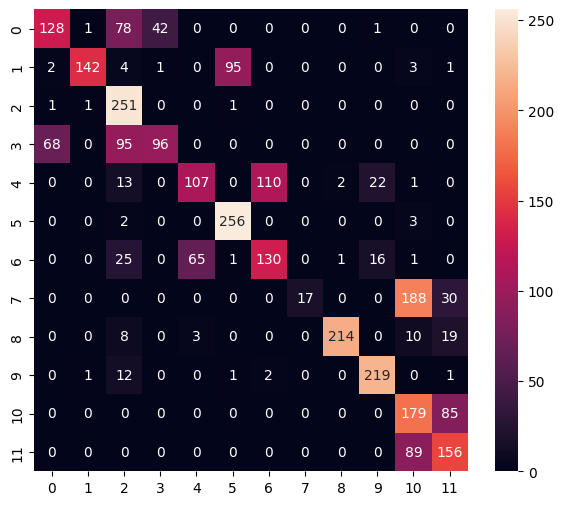

Classification Report
              precision    recall  f1-score   support

           0       0.64      0.51      0.57       250
           1       0.98      0.57      0.72       248
           2       0.51      0.99      0.68       254
           3       0.69      0.37      0.48       259
           4       0.61      0.42      0.50       255
           5       0.72      0.98      0.83       261
           6       0.54      0.54      0.54       239
           7       1.00      0.07      0.13       235
           8       0.99      0.84      0.91       254
           9       0.85      0.93      0.89       236
          10       0.38      0.68      0.49       264
          11       0.53      0.64      0.58       245

    accuracy                           0.63      3000
   macro avg       0.70      0.63      0.61      3000
weighted avg       0.70      0.63      0.61      3000



In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Convert to model for Tensorflow-Lite

In [20]:
# Save as a model dedicated to inference
model.save(model_save_path, include_optimizer=False)

c:\Users\Ian\git\553.806_Capstone_HandGesture\.venv\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [21]:
# Transform model (quantization)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\Ian\AppData\Local\Temp\tmp5k7tr7hu\assets


INFO:tensorflow:Assets written to: C:\Users\Ian\AppData\Local\Temp\tmp5k7tr7hu\assets


21304

# Inference test

In [22]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [23]:
# Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [24]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [25]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: total: 0 ns
Wall time: 3 ms


In [26]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[2.1455366e-09 1.5609644e-01 8.0659498e-05 4.1907136e-09 1.1258722e-07
 8.2105780e-01 5.1261928e-09 9.5934458e-03 3.3365524e-07 4.0526766e-06
 1.2765486e-02 4.0165448e-04]
5
